In [1]:
%matplotlib inline

In [2]:
from imutils.object_detection import non_max_suppression
import numpy as np
import argparse
import time
import cv2


from matplotlib import pyplot as plt

In [3]:
ret, thresh1 = cv2.threshold(im1,180,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
dilated = cv2.dilate(thresh1,kernel,iterations = 2)
_, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cordinates = []
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cordinates.append((x,y,w,h))
    #bound the images
    cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),1)

cv2.namedWindow('BindingBox', cv2.WINDOW_NORMAL)
cv2.imwrite('data/BindingBox4.jpg',im)

NameError: name 'im1' is not defined

In [3]:
# load the input image and grab the image dimensions
image = cv2.imread("./test_data/IMG_5794.JPG")
orig = image.copy()
(H, W) = image.shape[:2]

print(H, W)

4032 3024


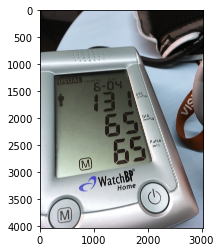

In [4]:
plt.imshow(orig)
plt.show()

In [5]:
# Make the new width 4032 by 3072 which are both divisible by 32
image = cv2.resize(image, (3072, H))
(H, W) = image.shape[:2]

In [6]:
print(H, W)

4032 3072


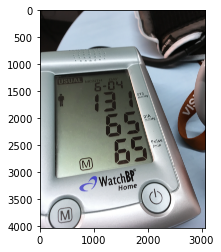

In [7]:
plt.imshow(image)
plt.show()

In [5]:
# 2 layers
# - 1. output probabilities of whether the image contains text or not
# - 2. the bounding box geometry when text is found
layerNames = [
	"feature_fusion/Conv_7/Sigmoid",
	"feature_fusion/concat_3"]

In [15]:
# load the pre-trained EAST text detector
print("[INFO] loading EAST text detector...")
net = cv2.dnn.readNet("./OpenCVModel/frozen_east_text_detection.pb")

[INFO] loading EAST text detector...


In [8]:
import pytesseract

In [9]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/Cellar/tesseract/4.1.1/bin/tesseract'
pytesseract.image_to_string(image)

' \n\x0c'

In [45]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    #return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return cv2.threshold(image,180,255,cv2.THRESH_BINARY_INV)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    #return cv2.dilate(image, kernel, iterations = 1)
    return cv2.dilate(image, kernel, iterations = 2)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


In [63]:
# Preprocess?
gray = get_grayscale(image)
dilate1 = dilate(gray)
thresh = thresholding(dilate1)
open1 = opening(thresh)
#canny1 = canny(open1)

#deskew1 = deskew(open1)

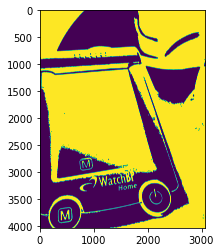

In [65]:
plt.imshow(open1)
#plt.imshow(thresh)
plt.show()

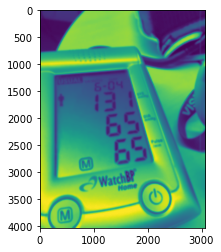

a 917 3240 1108 3621 0
a 921 3299 1203 3363 0
M 2518 3147 2877 3617 0
i 2637 3143 2877 3621 0
s 957 870 1044 951 0
w 1085 773 1244 963 0
a 1265 792 1346 918 0
t 1351 809 1411 944 0
c 1373 713 1503 1101 0
h 1418 717 1526 946 0
( 0 0 441 581 0
a 154 0 731 577 0
) 440 0 731 581 0
© 1797 0 2945 861 0
) 2369 0 2947 865 0



In [78]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
thresh = cv2.GaussianBlur(gray, (83,83), 0)

plt.imshow(thresh)
plt.show()

boxes = pytesseract.image_to_boxes(thresh, config='--psm 6')
print(boxes)

a 917 3240 1108 3621 0
a 921 3299 1203 3363 0
M 2518 3147 2877 3617 0
i 2637 3143 2877 3621 0
s 957 870 1044 951 0
w 1085 773 1244 963 0
a 1265 792 1346 918 0
t 1351 809 1411 944 0
c 1373 713 1503 1101 0
h 1418 717 1526 946 0
( 0 0 441 581 0
a 154 0 731 577 0
) 440 0 731 581 0
© 1797 0 2945 861 0
) 2369 0 2947 865 0


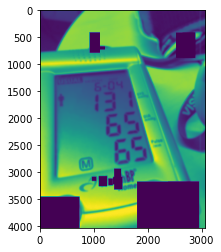

In [79]:
img1 = thresh
for b in boxes.splitlines():
    b = b.split(' ')
    img1 = cv2.rectangle(thresh, 
                        (int(b[1]), h - int(b[2])), 
                        (int(b[3]), h - int(b[4])), 
                        (0, 255, 0), 
                        -1 # Pixel border
                       )

#cv2.imshow('img', img)
plt.imshow(img1)
plt.show()